In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *

In [2]:
window = '10px_diameter'
df = pd.read_csv(f'/data/HSC/HSC_v6/step1/g_band_sextractor/{window}_test_set_subset/segmented_mag_data_v1.csv')
predictions = pd.read_csv('/predictions/HSC_v6_NN_neurips_combined_with_5pool_v11/testing_predictions.csv')

In [3]:
full_df = pd.merge(df, predictions, on='object_id')

In [4]:
full_df['bias'] = pd.Series([calculate_bias(i, j, conventional=True) for i, j in zip(full_df['photoz'], full_df['specz'])])
full_df['outlier_rate'] = pd.Series([calculate_outlier_rate(i, j, conventional=True) for i, j in zip(full_df['photoz'], full_df['specz'])])
full_df['loss'] = pd.Series([calculate_loss(i, j) for i, j in zip(full_df['photoz'], full_df['specz'])])

Percentage of images with more than one object in a 10px_diameter central window: 3.68%


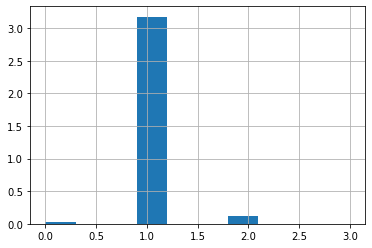

In [5]:
full_df["NUMBER_IN_CENTER"].hist(density=True)
print(f'Percentage of images with more than one object in a {window} central window: {(len(df[df["NUMBER_IN_CENTER"] > 1]) / len(df)):.2%}')

In [6]:
print(
f'''Average bias of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["bias"]):.6f}
Average bias of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["bias"]):.6f}
Average loss of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["loss"]):.6f}
Average loss of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["loss"]):.6f}
Outlier rate of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["outlier_rate"]):.2%}
Outlier rate of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["outlier_rate"]):.2%}
Average g band magnitude of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["g_cmodel_mag"]):.6f}
Average g band magnitude of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["g_cmodel_mag"]):.6f}
Average petrosian radius of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["PETRO_RADIUS"]):.6f}
Average petrosian radius of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["PETRO_RADIUS"]):.6f}
Average redshift of crowded galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] > 1]["specz"]):.6f}
Average redshift radius of lone galaxy centers: {np.mean(full_df[full_df["NUMBER_IN_CENTER"] == 1]["specz"]):.6f}
'''
)

Average bias of crowded galaxy centers: 0.003605
Average bias of lone galaxy centers: 0.004443
Average loss of crowded galaxy centers: 0.058638
Average loss of lone galaxy centers: 0.056491
Outlier rate of crowded galaxy centers: 3.25%
Outlier rate of lone galaxy centers: 3.31%
Average g band magnitude of crowded galaxy centers: 22.253397
Average g band magnitude of lone galaxy centers: 21.506877
Average petrosian radius of crowded galaxy centers: 8.662122
Average petrosian radius of lone galaxy centers: 8.324629
Average redshift of crowded galaxy centers: 0.587951
Average redshift radius of lone galaxy centers: 0.617414



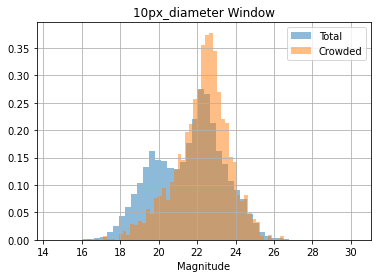

In [7]:
df['g_cmodel_mag'].hist(density=True, label='Total', bins=50, alpha=.5)
df[df['NUMBER_IN_CENTER'] > 1]['g_cmodel_mag'].hist(density=True, label='Crowded', bins=50, alpha=.5)
plt.xlabel('Magnitude')
plt.title(f'{window} Window')
plt.legend()

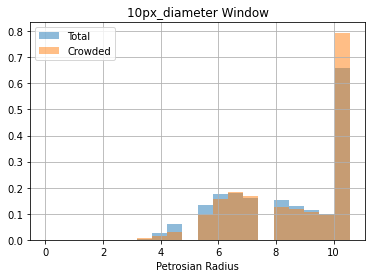

In [8]:
df['PETRO_RADIUS'].hist(density=True, label='Total', bins=20, alpha=0.5)
df[df['NUMBER_IN_CENTER'] > 1]['PETRO_RADIUS'].hist(density=True, label='Crowded', bins=20, alpha=.5)
plt.xlabel('Petrosian Radius')
plt.title(f'{window} Window')
plt.legend()

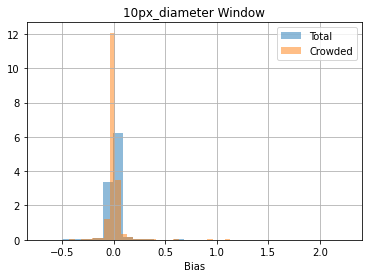

In [9]:
full_df['bias'].hist(density=True, label='Total', bins=30, alpha=.5)
full_df[full_df['NUMBER_IN_CENTER'] > 1]['bias'].hist(density=True, label='Crowded', bins=30, alpha=.5)
plt.xlabel('Bias')
plt.title(f'{window} Window')
plt.legend()

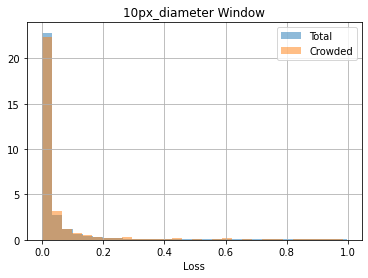

In [10]:
full_df['loss'].hist(density=True, label='Total', bins=30, alpha=.5)
full_df[full_df['NUMBER_IN_CENTER'] > 1]['loss'].hist(density=True, label='Crowded', bins=30, alpha=.5)
plt.xlabel('Loss')
plt.title(f'{window} Window')
plt.legend()

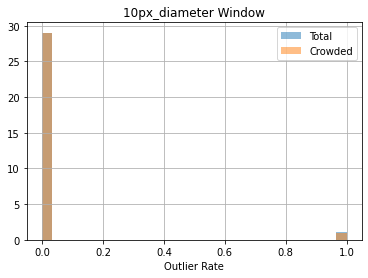

In [11]:
full_df['outlier_rate'].hist(density=True, label='Total', bins=30, alpha=.5)
full_df[full_df['NUMBER_IN_CENTER'] > 1]['outlier_rate'].hist(density=True, label='Crowded', bins=30, alpha=.5)
plt.xlabel('Outlier Rate')
plt.title(f'{window} Window')
plt.legend()

Text(0.5, 1.0, 'Crowded')

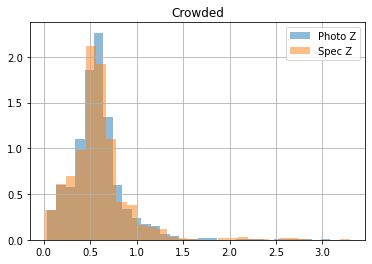

In [12]:
full_df[full_df['NUMBER_IN_CENTER'] > 1]['photoz'].hist(bins=30, alpha=0.5, label='Photo Z', density=True)
full_df[full_df['NUMBER_IN_CENTER'] > 1]['specz'].hist(bins=30, alpha=0.5, label='Spec Z', density=True)
plt.legend()
plt.title('Crowded')

Text(0.5, 1.0, 'Lone')

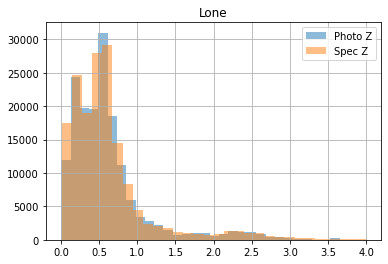

In [13]:
full_df[full_df['NUMBER_IN_CENTER'] == 1]['photoz'].hist(bins=30, alpha=0.5, label='Photo Z')
full_df[full_df['NUMBER_IN_CENTER'] == 1]['specz'].hist(bins=30, alpha=0.5, label='Spec Z')
plt.legend()
plt.title('Lone')

In [14]:
crowded_bins = np.linspace(full_df[full_df['NUMBER_IN_CENTER'] > 1]['specz'].min(), full_df[full_df['NUMBER_IN_CENTER'] > 1]['specz'].max(), 20)
crowded_groups = full_df.groupby(np.digitize(full_df['specz'], crowded_bins))

lone_bins = np.linspace(full_df[full_df['NUMBER_IN_CENTER'] == 1]['specz'].min(), full_df[full_df['NUMBER_IN_CENTER'] == 1]['specz'].max(), 20)
lone_groups = full_df.groupby(np.digitize(full_df['specz'], lone_bins))

In [15]:
crowded_avg_outlier = crowded_groups.mean()['outlier_rate']
lone_avg_outlier = lone_groups.mean()['outlier_rate']

crowded_bias = crowded_groups.mean()['bias']
lone_bias = lone_groups.mean()['bias']

crowded_loss = crowded_groups.mean()['loss']
lone_loss = lone_groups.mean()['loss']

crowded_mag = crowded_groups.mean()['g_cmodel_mag']
lone_mag = lone_groups.mean()['g_cmodel_mag']

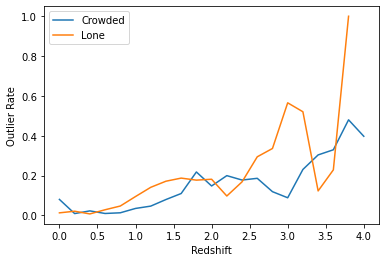

In [16]:
plt.plot(np.arange(len(crowded_groups))*4/len(crowded_bins+1), crowded_avg_outlier, label='Crowded')
plt.plot(np.arange(len(lone_groups))*4/len(lone_bins+1), lone_avg_outlier, label='Lone') # 0.2 is the bin size
plt.xlabel('Redshift')
plt.ylabel('Outlier Rate')
plt.legend()

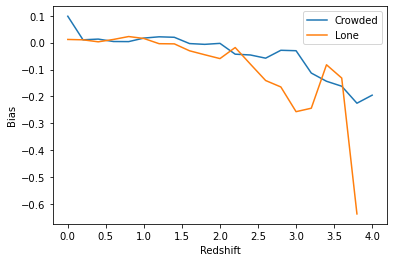

In [17]:
plt.plot(np.arange(len(crowded_groups))*4/len(crowded_bins+1), crowded_bias, label='Crowded')
plt.plot(np.arange(len(lone_groups))*4/len(lone_bins+1), lone_bias, label='Lone') # 0.2 is the bin size
plt.xlabel('Redshift')
plt.ylabel('Bias')
plt.legend()

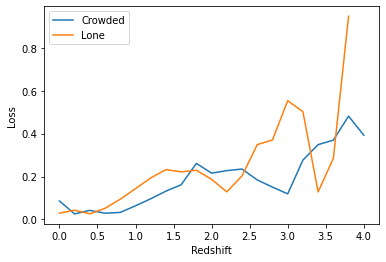

In [18]:
plt.plot(np.arange(len(crowded_groups))*4/len(crowded_bins+1), crowded_loss, label='Crowded')
plt.plot(np.arange(len(lone_groups))*4/len(lone_bins+1), lone_loss, label='Lone') # 0.2 is the bin size
plt.xlabel('Redshift')
plt.ylabel('Loss')
plt.legend()

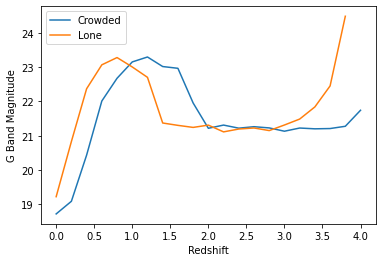

In [19]:
plt.plot(np.arange(len(crowded_groups))*4/len(crowded_bins+1), crowded_mag, label='Crowded')
plt.plot(np.arange(len(lone_groups))*4/len(lone_bins+1), lone_mag, label='Lone') # 0.2 is the bin size
plt.xlabel('Redshift')
plt.ylabel('G Band Magnitude')
plt.legend()

In [20]:
len(np.unique(full_df['object_id'])) # number of galaxies

42928

In [21]:
bins = np.linspace(full_df['specz'].min(), full_df['specz'].max(), 20)
groups = full_df.groupby(np.digitize(full_df['specz'], bins))
outlier = groups.mean()['outlier_rate']

Text(0, 0.5, 'Outlier Rate')

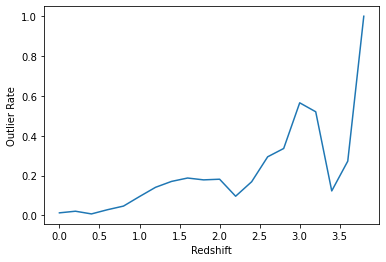

In [22]:
plt.plot(np.arange(len(groups))*4/len(bins+1), outlier)
plt.xlabel('Redshift')
plt.ylabel('Outlier Rate') #total